## XML 예시

In [2]:
import xmltodict

In [7]:
with open('EMS8_CaCellInfo-7.0.0.xml', 'rt', encoding='cp949') as f:
    obj = xmltodict.parse(f.read())

In [15]:
obj

OrderedDict([('cn:bulkCmConfigDataFile',
              OrderedDict([('@xmlns:cn', 'ENB-CONFIG'),
                           ('@xmlns:xt', 'samsungNrmBase'),
                           ('@xmlns:en', 'CPS-ENB'),
                           ('cn:fileHeader',
                            OrderedDict([('@fileFormatVersion', '2.0.0'),
                                         ('@senderName', 'SamsungLSM'),
                                         ('@vendorName', 'SAMSUNG')])),
                           ('en:CaCellInfo',
                            [OrderedDict([('@xmlns:en', 'CPS-ENB'),
                                          ('en:attributes',
                                           OrderedDict([('en:neVersion',
                                                         '7.0.0'),
                                                        ('en:neId', '17977'),
                                                        ('en:neName',
                                                         '대문교LDB_0

In [14]:
obj['cn:bulkCmConfigDataFile']['cn:fileHeader']['@senderName']

'SamsungLSM'

In [16]:
from collections import OrderedDict

In [22]:
import random
import string

mydict = {}
for i in range(10):
    key = random.choice(string.ascii_lowercase)
    value = random.randint(1, 100)
    mydict[key] = value

In [23]:
mydict

{'b': 46,
 'c': 74,
 'e': 7,
 'h': 74,
 'k': 23,
 'p': 85,
 'r': 21,
 't': 81,
 'w': 19}

In [24]:
for key in mydict:
    print(key)

h
p
w
k
e
b
c
t
r


In [27]:
odict = OrderedDict([
    ['a', 1],
    ['b', 2],
])
odict

OrderedDict([('a', 1), ('b', 2)])

In [28]:
odict['a']

1

In [29]:
for key in odict:
    print(key)

a
b


## 1장. 서울시 구별 CCTV 현황 분석

In [30]:
import pandas as pd

In [42]:
CCTV_Seoul = pd.read_csv('data/01. CCTV_in_Seoul.csv', encoding='utf8')
print(CCTV_Seoul.shape)
CCTV_Seoul.head(3)

(25, 6)


,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204


In [43]:
CCTV_Seoul.columns[0]

'기관명'

In [44]:
CCTV_Seoul.rename(columns={'기관명': '구별'}, inplace=True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [51]:
pop_Seoul = pd.read_excel('data/01. Population_in_Seoul.xls',
                         header=2,
                         parse_cols='B, D, G, J, N')
print(pop_Seoul.shape)
pop_Seoul.head()

(27, 5)


,자치구,계,계.1,계.2,65세이상고령자
0,합계,10158411.0,9891448.0,266963.0,1353486.0
1,종로구,164640.0,155109.0,9531.0,26034.0
2,중구,134174.0,125332.0,8842.0,21249.0
3,용산구,243922.0,228960.0,14962.0,36727.0
4,성동구,312933.0,304879.0,8054.0,40902.0


In [60]:
columns = {
    '자치구': '구별',
    '계': '인구수',
    '계.1': '한국인',
    '계.2': '외국인',
    '65세이상고령자': '고령자',
}

In [63]:
pop_Seoul.rename(columns=columns, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10158411.0,9891448.0,266963.0,1353486.0
1,종로구,164640.0,155109.0,9531.0,26034.0
2,중구,134174.0,125332.0,8842.0,21249.0
3,용산구,243922.0,228960.0,14962.0,36727.0
4,성동구,312933.0,304879.0,8054.0,40902.0


## Pandas 문법

In [64]:
import numpy as np

In [65]:
np.nan

nan

In [73]:
pd.date_range('20130101', periods=6)  #, freq='D')

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [74]:
pop_Seoul.describe()

,인구수,한국인,외국인,고령자
count,2.600000e+01,2.600000e+01,26.000000,2.600000e+01
mean,7.814162e+05,7.608806e+05,20535.615385,1.041143e+05
std,1.916739e+06,1.866696e+06,50861.561267,2.552240e+05
min,1.341740e+05,1.253320e+05,2045.000000,2.124900e+04
25%,3.336160e+05,3.304872e+05,4405.250000,4.909775e+04
50%,4.126285e+05,4.043050e+05,9186.500000,5.559450e+04
75%,4.880810e+05,4.838128e+05,14889.250000,6.559750e+04
max,1.015841e+07,9.891448e+06,266963.000000,1.353486e+06


In [78]:
pop_Seoul.sort_values('한국인', ascending=False)

,구별,인구수,한국인,외국인,고령자
0,합계,10158411.0,9891448.0,266963.0,1353486.0
24,송파구,668366.0,661750.0,6616.0,75301.0
16,강서구,607877.0,601391.0,6486.0,75046.0
23,강남구,565731.0,560827.0,4904.0,64579.0
11,노원구,562278.0,558432.0,3846.0,73588.0
21,관악구,522849.0,505188.0,17661.0,69486.0
12,은평구,491899.0,487507.0,4392.0,73850.0
15,양천구,476627.0,472730.0,3897.0,54598.0
8,성북구,458261.0,446457.0,11804.0,65937.0
22,서초구,447177.0,442833.0,4344.0,52738.0


## 1-4. pandas 이용해서 CCTV와 인구 현황 데이터 파악하기

In [79]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [82]:
CCTV_Seoul.sort_values('소계').head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


In [83]:
CCTV_Seoul.sort_values('소계', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


In [101]:
최근3년합 = (CCTV_Seoul['2014년'] + CCTV_Seoul['2015년'] + CCTV_Seoul['2016년'])
최근증가율 = (최근3년합 / CCTV_Seoul['2013년도 이전']) * 100  # Series
CCTV_Seoul['최근증가율'] = 최근증가율

CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780


In [102]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780


In [109]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10158411.0,9891448.0,266963.0,1353486.0
1,종로구,164640.0,155109.0,9531.0,26034.0
2,중구,134174.0,125332.0,8842.0,21249.0
3,용산구,243922.0,228960.0,14962.0,36727.0
4,성동구,312933.0,304879.0,8054.0,40902.0


In [115]:
pop_Seoul.drop(0, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,164640.0,155109.0,9531.0,26034.0
2,중구,134174.0,125332.0,8842.0,21249.0
3,용산구,243922.0,228960.0,14962.0,36727.0
4,성동구,312933.0,304879.0,8054.0,40902.0
5,광진구,372414.0,357743.0,14671.0,43579.0


In [126]:
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan], dtype=object)

In [128]:
mask = pop_Seoul['구별'].isnull()
pop_Seoul[mask]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [130]:
pop_Seoul.drop(26, inplace=True)
pop_Seoul.tail()

,구별,인구수,한국인,외국인,고령자
21,관악구,522849.0,505188.0,17661.0,69486.0
22,서초구,447177.0,442833.0,4344.0,52738.0
23,강남구,565731.0,560827.0,4904.0,64579.0
24,송파구,668366.0,661750.0,6616.0,75301.0
25,강동구,446760.0,442654.0,4106.0,55902.0


In [131]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164640.0,155109.0,9531.0,26034.0,5.788994,15.812682
2,중구,134174.0,125332.0,8842.0,21249.0,6.589950,15.836898
3,용산구,243922.0,228960.0,14962.0,36727.0,6.133928,15.056862
4,성동구,312933.0,304879.0,8054.0,40902.0,2.573714,13.070529
5,광진구,372414.0,357743.0,14671.0,43579.0,3.939433,11.701762


In [134]:
pop_Seoul.sort_values('인구수', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,668366.0,661750.0,6616.0,75301.0,0.989877,11.266432
16,강서구,607877.0,601391.0,6486.0,75046.0,1.066992,12.345590
23,강남구,565731.0,560827.0,4904.0,64579.0,0.866843,11.415143
11,노원구,562278.0,558432.0,3846.0,73588.0,0.684003,13.087476
21,관악구,522849.0,505188.0,17661.0,69486.0,3.377839,13.289879


In [135]:
pop_Seoul.sort_values('외국인', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,401908.0,368818.0,33090.0,53620.0,8.233228,13.341362
17,구로구,443288.0,412972.0,30316.0,58260.0,6.838895,13.142697
18,금천구,253646.0,235608.0,18038.0,33818.0,7.111486,13.332755
21,관악구,522849.0,505188.0,17661.0,69486.0,3.377839,13.289879
6,동대문구,367769.0,352011.0,15758.0,55287.0,4.284755,15.033078


In [136]:
pop_Seoul.sort_values('고령자', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,668366.0,661750.0,6616.0,75301.0,0.989877,11.266432
16,강서구,607877.0,601391.0,6486.0,75046.0,1.066992,12.345590
12,은평구,491899.0,487507.0,4392.0,73850.0,0.892866,15.013245
11,노원구,562278.0,558432.0,3846.0,73588.0,0.684003,13.087476
21,관악구,522849.0,505188.0,17661.0,69486.0,3.377839,13.289879


In [137]:
pop_Seoul.sort_values('고령자비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,329042.0,325552.0,3490.0,56078.0,1.060655,17.042809
2,중구,134174.0,125332.0,8842.0,21249.0,6.589950,15.836898
1,종로구,164640.0,155109.0,9531.0,26034.0,5.788994,15.812682
10,도봉구,347338.0,345293.0,2045.0,52909.0,0.588764,15.232713
3,용산구,243922.0,228960.0,14962.0,36727.0,6.133928,15.056862


## 1-6. CCTV 데이터와 인구 현황 데이터를 합치고 분석하기

In [142]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780


In [143]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164640.0,155109.0,9531.0,26034.0,5.788994,15.812682
2,중구,134174.0,125332.0,8842.0,21249.0,6.589950,15.836898
3,용산구,243922.0,228960.0,14962.0,36727.0,6.133928,15.056862
4,성동구,312933.0,304879.0,8054.0,40902.0,2.573714,13.070529
5,광진구,372414.0,357743.0,14671.0,43579.0,3.939433,11.701762


In [156]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,565731.0,560827.0,4904.0,64579.0,0.866843,11.415143
1,강동구,1010,379,99,155,377,166.490765,446760.0,442654.0,4106.0,55902.0,0.919062,12.512759
2,강북구,831,369,120,138,204,125.203252,329042.0,325552.0,3490.0,56078.0,1.060655,17.042809
3,강서구,911,388,258,184,81,134.793814,607877.0,601391.0,6486.0,75046.0,1.066992,12.345590
4,관악구,2109,846,260,390,613,149.290780,522849.0,505188.0,17661.0,69486.0,3.377839,13.289879


In [157]:
'2013년도 이전' in data_result  # 컬럼 존재여부 검사

True

In [158]:
del data_result['2013년도 이전']

In [175]:
# for key in ('2014년', '2015년', '2016년'):
#     del data_result[key]
    
for year in range(2014, 2016+1):
    key = '{}년'.format(year)
    if key in data_result:
        del data_result[key]

# data_result.iloc[:, 2:5]

In [176]:
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,565731.0,560827.0,4904.0,64579.0,0.866843,11.415143
1,강동구,1010,166.490765,446760.0,442654.0,4106.0,55902.0,0.919062,12.512759
2,강북구,831,125.203252,329042.0,325552.0,3490.0,56078.0,1.060655,17.042809
3,강서구,911,134.793814,607877.0,601391.0,6486.0,75046.0,1.066992,12.345590
4,관악구,2109,149.290780,522849.0,505188.0,17661.0,69486.0,3.377839,13.289879


In [178]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,565731.0,560827.0,4904.0,64579.0,0.866843,11.415143
강동구,1010,166.490765,446760.0,442654.0,4106.0,55902.0,0.919062,12.512759
강북구,831,125.203252,329042.0,325552.0,3490.0,56078.0,1.060655,17.042809
강서구,911,134.793814,607877.0,601391.0,6486.0,75046.0,1.066992,12.345590
관악구,2109,149.290780,522849.0,505188.0,17661.0,69486.0,3.377839,13.289879


In [179]:
import numpy as np

In [187]:
np.corrcoef(data_result['고령자'], data_result['소계'])

array([[ 1.        ,  0.16618733],
       [ 0.16618733,  1.        ]])

In [185]:
np.corrcoef(data_result['외국인'], data_result['소계'])

array([[ 1.        ,  0.03133686],
       [ 0.03133686,  1.        ]])

In [183]:
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[ 1.        ,  0.23603622],
       [ 0.23603622,  1.        ]])

In [188]:
data_result.sort_values('소계', ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,565731.0,560827.0,4904.0,64579.0,0.866843,11.415143
양천구,2482,34.671731,476627.0,472730.0,3897.0,54598.0,0.817620,11.455079
서초구,2297,63.371266,447177.0,442833.0,4344.0,52738.0,0.971427,11.793540
관악구,2109,149.290780,522849.0,505188.0,17661.0,69486.0,3.377839,13.289879
은평구,2108,85.237258,491899.0,487507.0,4392.0,73850.0,0.892866,15.013245


## 1-7. 파이썬의 대표 시각화 도구 - Matplotlib

In [189]:
%matplotlib inline

In [190]:
import matplotlib.pyplot as plt

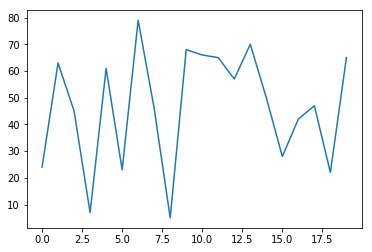

In [193]:
import random

numbers = []
for i in range(20):
    numbers.append(random.randint(0, 100))

plt.figure()
# plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0])
plt.plot(numbers)
plt.show()

## 함수의 인자

In [138]:
def mysum(x, y):
    return x + y

In [139]:
mysum(1, 2)

3

In [140]:
mysum(x=1, y=2)

3